RUHAAN HAWALDAR BE 21137

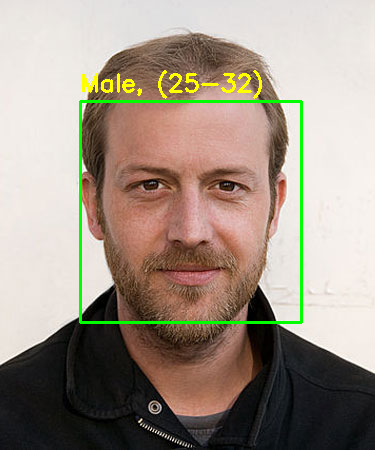

In [ ]:
# Step 1: Install OpenCV if not already installed
!pip install opencv-python

# Step 2: Import Required Libraries import cv2
import numpy as np
from google.colab.patches import cv2
from google.colab.patches import cv2_imshow

# # Step 3: Download Pretrained Models from OpenCV GitHub
# !mkdir -p models
# !wget -P models https://github.com/spmallick/learnopencv/raw/master/AgeGender/models/age_deploy.prototxt
# !wget -P models https://github.com/spmallick/learnopencv/raw/master/AgeGender/models/age_net.caffemodel
# !wget -P models https://github.com/spmallick/learnopencv/raw/master/AgeGender/models/gender_deploy.prototxt
# !wget -P models https://github.com/spmallick/learnopencv/raw/master/AgeGender/models/gender_net.caffemodel

# Step 4: Load Pretrained Models
age_net = cv2.dnn.readNetFromCaffe('/content/age_deploy.prototxt', '/content/age_net.caffemodel')


gender_net = cv2.dnn.readNetFromCaffe('/content/gender_deploy.prototxt', '/content/gender_net.caffemodel')
# Step 5: Load Haar Cascade for Face Detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# Step 6: Define Model Labels and Input Size
AGE_LIST = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
GENDER_LIST = ['Male', 'Female']

MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
INPUT_SIZE = (227, 227)
# Step 7: Load Image
img_path = '/content/image.jpg'
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 5)

# Step 8: Predict Age and Gender for Each Face
for (x, y, w, h) in faces:
     face_img = img[y:y+h, x:x+w].copy()
     blob = cv2.dnn.blobFromImage(face_img, 1.0, INPUT_SIZE, MODEL_MEAN_VALUES, swapRB=False)

# Predict Gender
     gender_net.setInput(blob)
     gender_preds = gender_net.forward()
     gender = GENDER_LIST[gender_preds[0].argmax()]
# Predict Age
     age_net.setInput(blob)
     age_preds = age_net.forward()
     age = AGE_LIST[age_preds[0].argmax()]

     label = f"{gender}, {age}"
     cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
     cv2.putText(img, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2)
# Step 9: Display Output Image
     cv2_imshow(img)